In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import scipy.stats as stats

In [81]:
n = 10    # sample size
p = 0.80  # probablity of success. probablity a visitor will buy a souvenir

In [82]:
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [83]:
from scipy.stats import binom
binomial = binom.pmf(k=k, n=n, p=p)

In [84]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

In [85]:
for i in range(len(binomial)):
    print(round(binomial[i],8)*100)

9.999999999999999e-06
0.00041
0.007373
0.07864299999999999
0.550502
2.6424119999999998
8.808038
20.132659
30.198988999999997
26.843546
10.737418


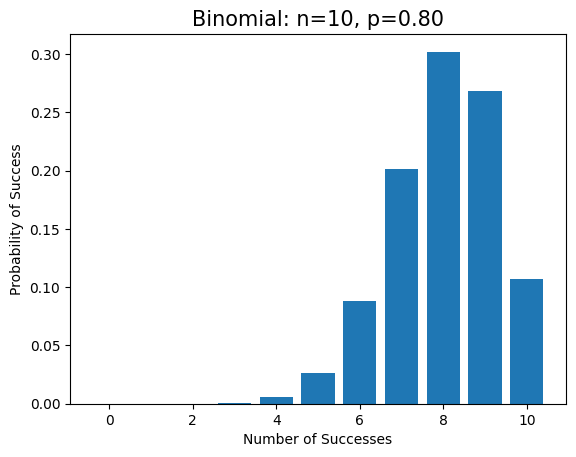

In [86]:
plt.bar(k, binomial)
plt.title('Binomial: n=%i, p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Success')
plt.show()


In [87]:
n1 = 12
k1 = 5
p1 = 1/6

In [88]:
binomial1 = binom.pmf(k=k1, n=n1,p=p1)
binomial1

0.028424982588612827

Text(0.5, 1.0, 'Binomial: n=12, p=0.17')

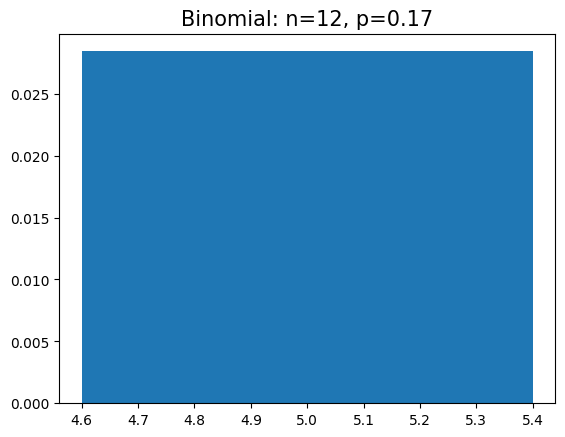

In [89]:
plt.bar(k1, binomial1)
plt.title('Binomial: n=%i, p=%.2f' % (n1,p1), fontsize=15)

In [91]:
n2 = 20
k2 = 6
p2 = 1/4

In [92]:
binomial2 = binom.pmf(k=k2, n=n2, p=p2)
binomial2

0.16860929321410364

In [93]:
binomial[10]

0.10737418240000006

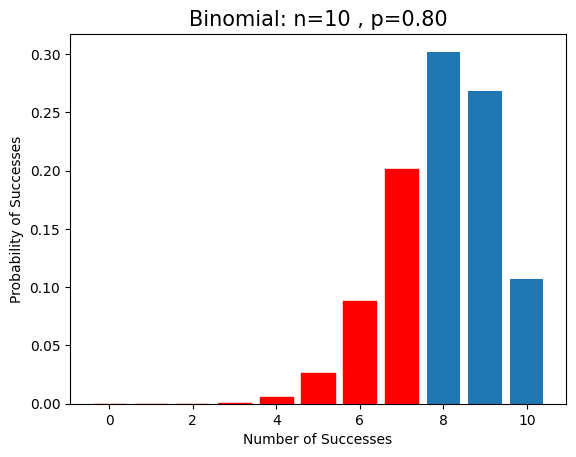

In [95]:
bar1 = plt.bar(k, binomial)
plt.title('Binomial: n=%i , p=%.2f' %(n,p), fontsize = 15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
for i in range(0,8):
    bar1[i].set_color('r')
plt.show()

In [96]:
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

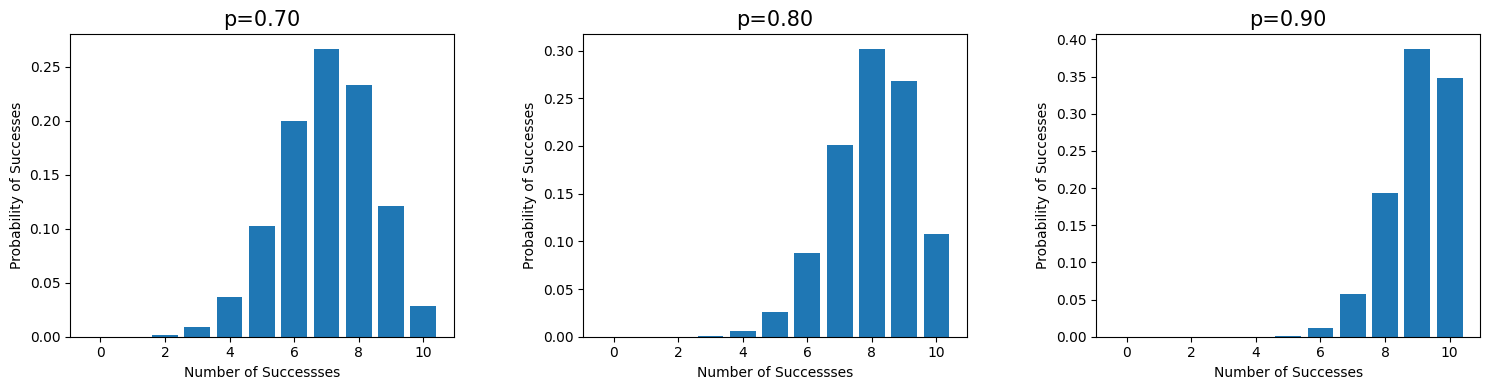

In [104]:
plt.figure(figsize=(15,4))

plt.subplot(131)
binomial_70 = binom.pmf(k,n,p=0.7)
plt.bar(k, binomial_70)
plt.title('p=%.2f' % (0.7), fontsize=15)
plt.xlabel('Number of Successses')
plt.ylabel('Probability of Successes')

plt.subplot(132)
binomial_80 = binom.pmf(k, n, p=0.8)
plt.bar(k, binomial_80)
plt.title('p=%.2f' %(0.8), fontsize=15)
plt.xlabel('Number of Successses')
plt.ylabel('Probability of Successes')

plt.subplot(133)
binomial_90 = binom.pmf(k, n, p=0.9)
plt.bar(k, binomial_90)
plt.title("p=%.2f" % (0.9), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.tight_layout(w_pad=5)

In [105]:
df = pd.read_csv('sat_score.csv')

In [106]:
df.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [108]:
from scipy.stats import norm
mu= df['score'].mean()
sigma=df['score'].std()
print('The estimated mean is', round(mu,2))
print('The estimated standard deviation is', round(sigma,2))

The estimated mean is 1007.46
The estimated standard deviation is 204.43


In [131]:
density = pd.DataFrame()
density['x']= np.linspace(
    df['score'].min()-0.01, df['score'].max()+0.01,100
)
density['pdf']= norm.pdf(density['x'], mu, sigma)

density.tail()

,x,pdf
95,1558.514242,0.000052
96,1571.888182,0.000043
97,1585.262121,0.000036
98,1598.636061,0.000030
99,1612.010000,0.000025


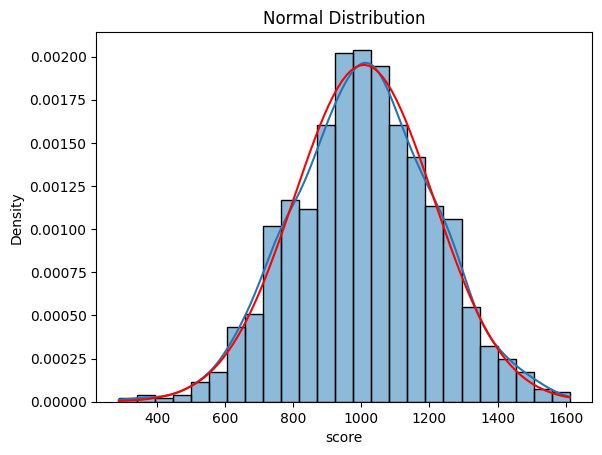

In [113]:
fig, ax = plt.subplots()
sns.histplot(df['score'], ax=ax, kde=True, stat='density')
ax.plot(density['x'], density['pdf'], color='red')
plt.title('Normal Distribution')
plt.show()

In [116]:
prob_less_than_800 = norm.cdf(800, mu, sigma)
print('The probability that a student will score less than 800 is',
      round(prob_less_than_800,4))

The probability that a student will score less than 800 is 0.1551


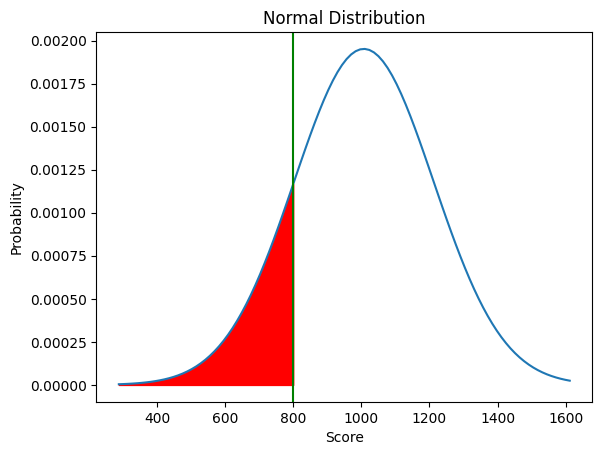

In [123]:
plt.plot(density['x'], density['pdf'])
plt.axvline(x=800, c='g')
x1=np.linspace(density['x'].min(),800,50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

In [124]:
prob_greater_than_1300 = 1- norm.cdf(1300, mu, sigma)
print('The probability that a student will score more than 1300 is:',
     round(prob_greater_than_1300,4))

The probability that a student will score more than 1300 is: 0.0762


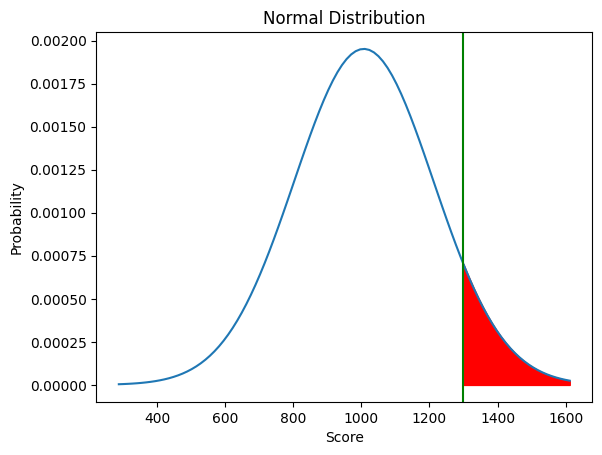

In [134]:
plt.plot(density['x'], density['pdf'])
plt.axvline(x=1300, c='g')
x1=np.linspace(1300, density['x'].max(),50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

In [127]:
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print('The 90th percentile score should be', round(score_90th_percentile))

The 90th percentile score should be 1269


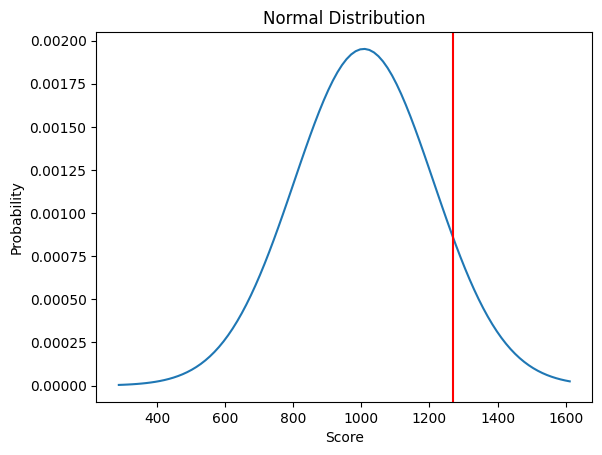

In [128]:
plt.plot(density['x'], density['pdf'])
plt.axvline(x=score_90th_percentile, c='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

In [136]:
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print('Minimum score to be in the top 5% should be', round(score_top_five_percent))

Minimum score to be in the top 5% should be 1344


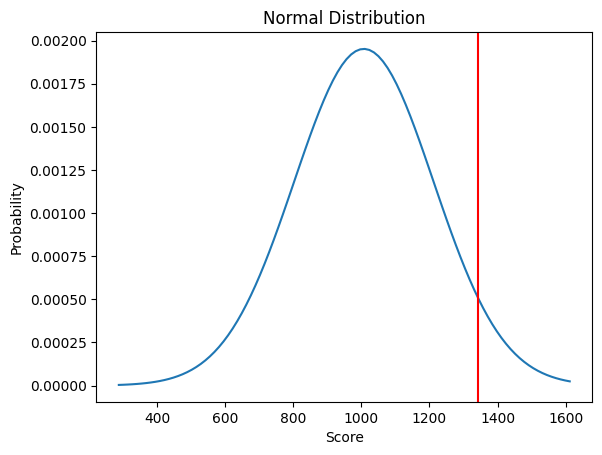

In [147]:
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_top_five_percent, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

In [150]:
score_70th_percent = 1-norm.cdf(750, mu, sigma)
round(score_70th_percent,4)

0.8961

In [152]:
score_95th_percent = norm.ppf(0.90, mu, sigma)
score_95th_percent

1269.4424694794875

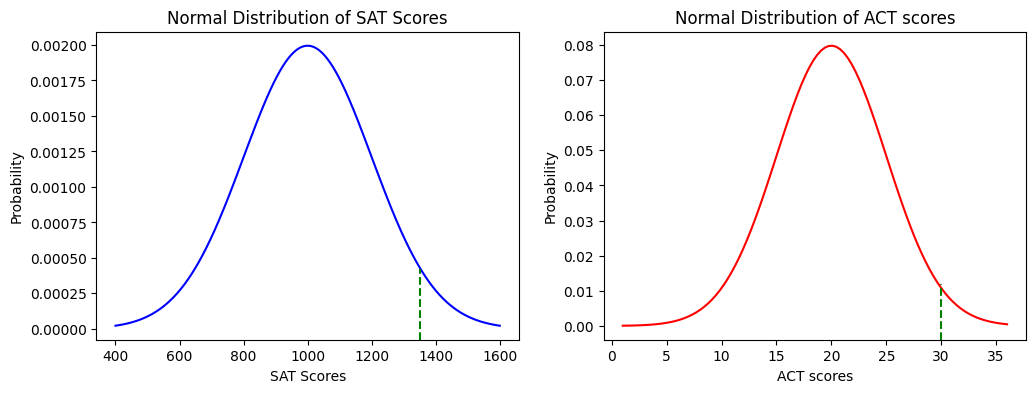

In [158]:
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
x = np.linspace(400,1600,1000)
ax1.plot(x, norm.pdf(x, loc=1000, scale = 200), color='b')
ax1.set_title('Normal Distribution of SAT Scores')
ax1.set_xlabel('SAT Scores')
ax1.set_ylabel('Probability')
ax1.axvline(1350, ymax=0.23, linestyle='--', color='green')

x1= np.linspace(1,36,100)
ax2.plot(x1, norm.pdf(x1, loc=20, scale=5), color='r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax = 0.18, linestyle = '--', color = 'green')
plt.show()

In [162]:
top_sat=(1350-1000)/200
print('The Z-score of highest scorer in SAT among all the applicants is', top_sat)

top_act=(30-20)/5
print('The Z-score of highest scorer in ACT among all applicants is', top_act)

The Z-score of highest scorer in SAT among all the applicants is 1.75
The Z-score of highest scorer in ACT among all applicants is 2.0


<function matplotlib.pyplot.show(close=None, block=None)>

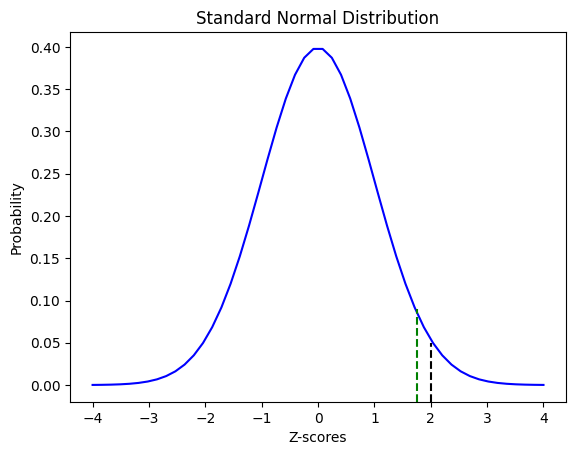

In [169]:
fig, ax = plt.subplots()
x = np.linspace(-4,4,50)
ax.plot(x, norm.pdf(x, loc=0, scale=1), color='b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(top_sat, ymax=0.25, linestyle='--', color='green')
ax.axvline(top_act, ymax=0.16, linestyle='--', color='black')
plt.show

In [177]:
top_physics = (60-47.5)/12.3
top_history = (85-77)/7.1
top_cs = (40-33)/7.3

print('Physics:', top_physics)
print('History:', top_history)
print('CS', top_cs)

Physics: 1.0162601626016259
History: 1.1267605633802817
CS 0.9589041095890412


In [179]:
#Salaries of employees in a company are normally distributed with a mean of $55000 with a standard deviation of $6200. 
# What percentage of employees earn approximately between $59000 and $67000?

mu=55000
sigma=6200
prob_less_than_59000 = norm.cdf(59000, mu, sigma)
prob_less_than_67000 = norm.cdf(67000, mu, sigma)
print(prob_less_than_67000-prob_less_than_59000)

0.23294586132016037


In [180]:
#First, calculate z-score for 59000 -> (59000-55000)/ 6200 = 0.645
#Then, calculate z-score for 67000 -> (67000-55000)/ 6200 = 1.9354
#Then, the probability that an employee earns approximately between 59000 and 67000 can be calculated using the below code:

import scipy.stats as stats
stats.norm.cdf(1.9354,loc=0,scale=1)-stats.norm.cdf(0.645,loc=0,scale=1)

0.23299297819393405

In [182]:
# Alternatively, the required probability can also be obtained without calculating the z-scores as below:
import scipy.stats as stats
stats.norm.cdf(67000,loc=55000,scale=6200) - stats.norm.cdf(59000,loc=55000,scale=6200)

0.23294586132016037

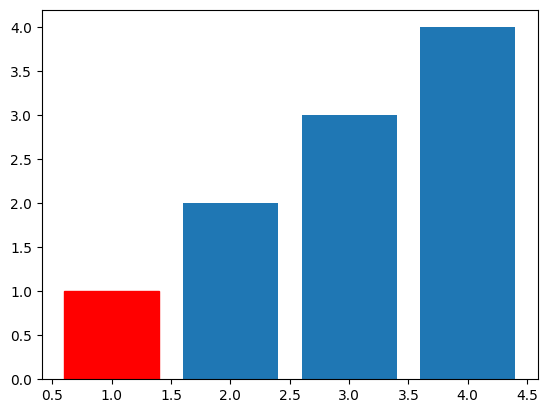

In [3]:
barlist=plt.bar([1,2,3,4], [1,2,3,4])
barlist[0].set_color('r')
plt.show()

In [4]:
barlist.

<BarContainer object of 4 artists>

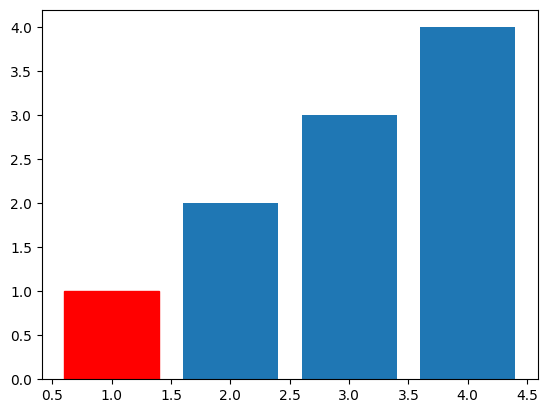

In [7]:
plt.bar([1,2,3,4], [1,2,3,4])[0].set_color('r')